# Submission Information:

### Team Member 1:
* UNI: mj2776 
* Name: Michael Jaron

### Team Member 2 [optional]:
* UNI:  
* Name:

# Step0 - Import Libraries, Load Data [0 points]

This is the basic step where you can load the data and create train and test sets for internal validation as per your convinience.

In [261]:
#write code below, you can make multiple cells

# for step1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
seed = 7
sns.set(style="whitegrid", color_codes=True)

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV

# for step2
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# for step3
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# for step4
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import FunctionTransformer

# for Bonus
from imblearn.ensemble import EasyEnsemble
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [5]:
df = pd.read_csv('./data/data.csv')

In [6]:
df.head()

,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,...,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,41.0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,...,2.0,999,0,nonexistent,-1.695118,92.698705,-46.727552,1.345160,5097.0,no
1,46.0,entrepreneur,married,unknown,no,no,no,cellular,may,wed,...,2.0,999,0,nonexistent,-1.767159,92.914878,-46.313088,1.314499,5100.0,no
2,56.0,unemployed,married,basic.9y,no,yes,yes,cellular,nov,fri,...,1.0,999,0,nonexistent,-0.100365,93.423076,-41.904559,4.003471,5193.0,no
3,89.0,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,...,4.0,999,0,nonexistent,-1.771314,93.672814,-46.045500,1.261668,5100.0,no
4,34.0,entrepreneur,married,university.degree,unknown,yes,no,cellular,jul,thu,...,8.0,999,0,nonexistent,1.458103,94.296285,-42.455877,5.152077,5233.0,no


# Step1 - Exploration and Preparation [10 points]

In this step, we expect you to look into the data and try to understand it before modeling. This understanding may lead to some basic data preparation steps which are common across the two model sets required.

In [7]:
#write code below, you can make multiple cells

def clean1(df):
    '''
    Initial clean up to help with visualization
    '''
    df = df.drop('duration', axis=1)
    # clean text categorical variables
    text_categ = ['job', 'marital_status', 'education', 'credit_default', 'housing', 'loan', 'month',
                 'day_of_week', 'prev_outcomes', 'subscribed', 'contact']

    df_clean = df.copy()
    
    for i in text_categ:
        df_clean[i] = df[i].astype('category').cat.codes
    
    return df_clean


df_clean = clean1(df)
print(df_clean.shape)
print(df_clean.columns.tolist())
df_clean.head()


(32950, 20)
['age', 'job', 'marital_status', 'education', 'credit_default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'prev_days', 'prev_contacts', 'prev_outcomes', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'subscribed']


,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,41.0,1,1,2,0,2,0,0,0,1,2.0,999,0,1,-1.695118,92.698705,-46.727552,1.345160,5097.0,0
1,46.0,2,1,7,0,0,0,0,6,4,2.0,999,0,1,-1.767159,92.914878,-46.313088,1.314499,5100.0,0
2,56.0,10,1,2,0,2,2,0,7,0,1.0,999,0,1,-0.100365,93.423076,-41.904559,4.003471,5193.0,0
3,89.0,5,0,0,0,2,0,0,6,4,4.0,999,0,1,-1.771314,93.672814,-46.045500,1.261668,5100.0,0
4,34.0,2,1,6,1,2,0,0,3,2,8.0,999,0,1,1.458103,94.296285,-42.455877,5.152077,5233.0,0


In [8]:
print(df['prev_days'].describe())
# print(df_clean['prev_days'].replace(999, 0))
print('percent of feauture missing', len(df_clean[df_clean['prev_days'] == 999])/float(len(df_clean)))
# print(df[df['prev_days'] != 999].describe())

count    32950.000000
mean       961.537906
std        189.209917
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: prev_days, dtype: float64
('percent of feauture missing', 0.9622761760242792)


In [9]:
y = np.array(df_clean['subscribed'])
X = np.array(df_clean.drop('subscribed', axis=1))
print(X.shape)

(32950, 19)


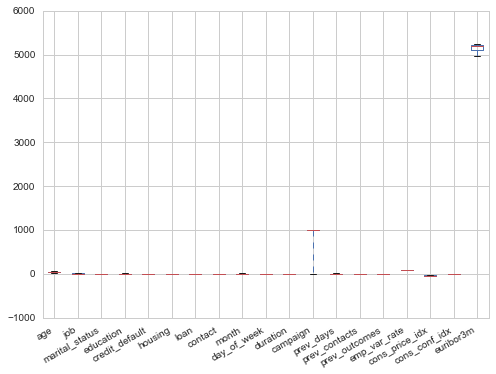

In [10]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), df.columns.tolist(), rotation=30, ha="right");

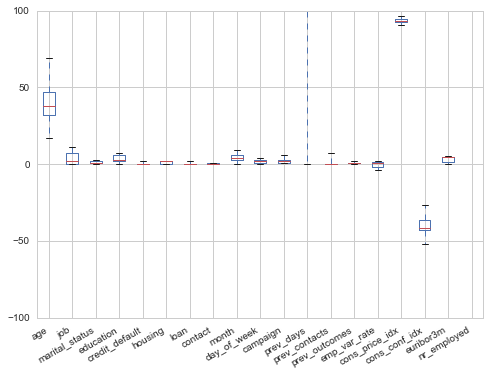

In [11]:
plt.boxplot(X)
plt.ylim([-100,100])
plt.xticks(np.arange(1, X.shape[1] + 1), df_clean.columns.tolist(), rotation=30, ha="right");

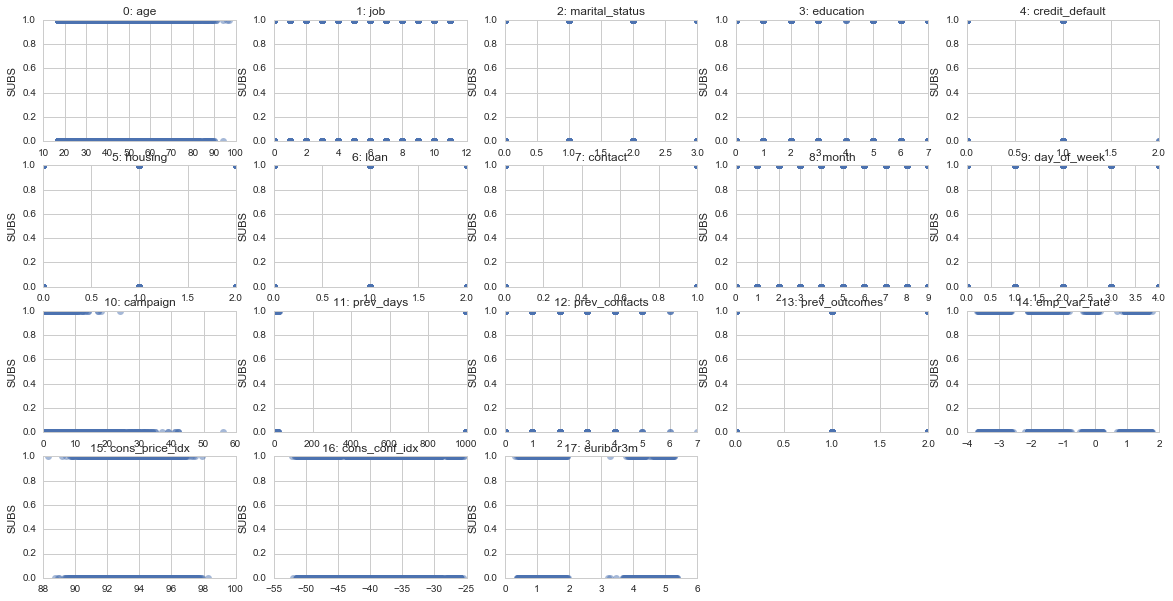

In [12]:
fig, axes = plt.subplots(4, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 17:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, df_clean.columns.tolist()[i]))
    ax.set_ylabel("SUBS")

("No's", 0.88734446130500755)
("Yes's", 0.11265553869499241)
('prev contacts', 0.17438543247344462)


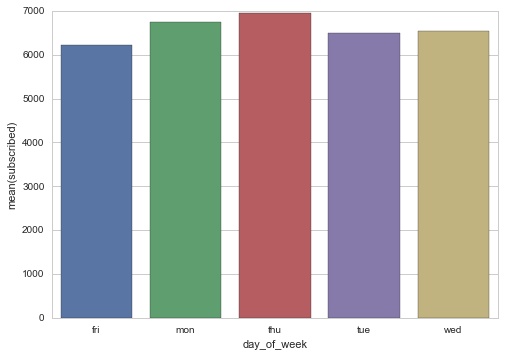

In [13]:
print("No's", np.sum(df['subscribed']== 'no') / float(len(df)))
print("Yes's", np.sum(df['subscribed']== 'yes') / float(len(df)))
print("prev contacts", df['prev_contacts'].mean())

day = df.groupby(['day_of_week']).count()
day = day.reset_index()
sns.barplot(x="day_of_week", y="subscribed", data=day);

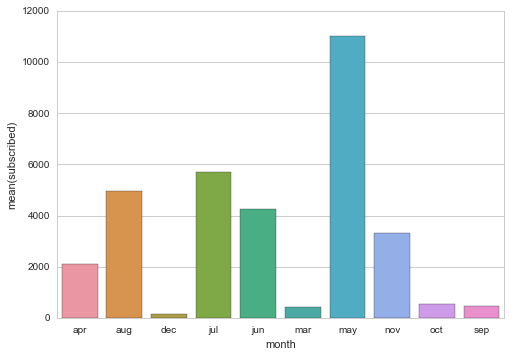

In [14]:
month = df.groupby(['month']).count()
month = month.reset_index()
sns.barplot(x="month", y="subscribed", data=month);

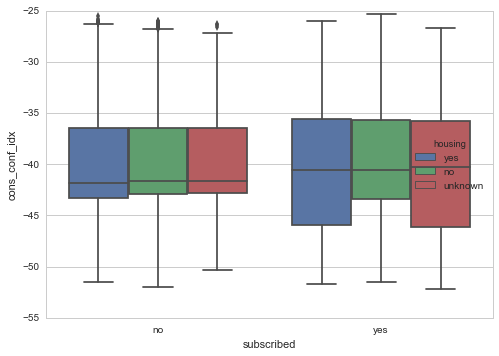

In [15]:
sns.boxplot(y="cons_conf_idx", x="subscribed", hue="housing", data=df);

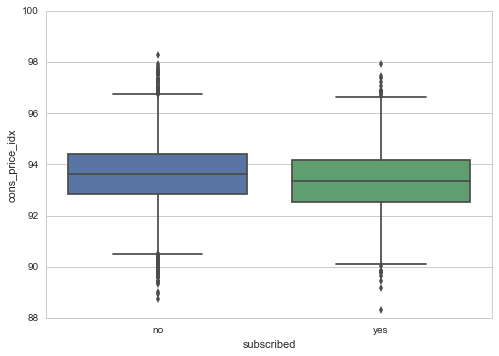

In [16]:
sns.boxplot(y="cons_price_idx", x="subscribed", data=df);

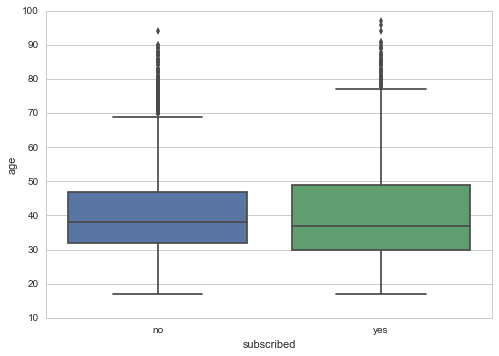

In [17]:
sns.boxplot(y="age", x="subscribed", data=df);

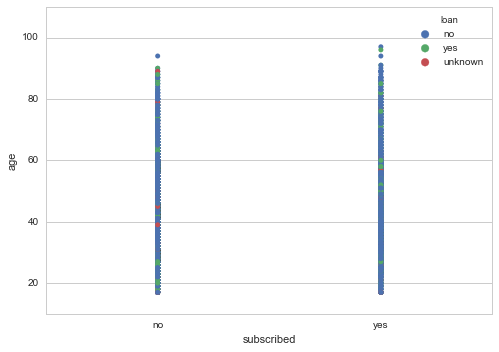

In [18]:
sns.stripplot(y="age", x="subscribed", hue="loan", data=df);

In [19]:
#write code below, you can make multiple cells

def clean_master(df, holdout=False):
    '''
    now completely clean for making models
    '''
    df = df.drop('duration', axis=1)
    # clean text categorical variables
    text_categ = ['job', 'marital_status', 'education', 'credit_default', 'housing', 'loan', 'month',
                 'day_of_week', 'prev_outcomes']
    
    text_categ_binary = ['subscribed', 'contact']

    df_clean = df.copy()
    
    for i in text_categ:
        df_clean = pd.get_dummies(df_clean, columns=[i])
    
    for i in text_categ_binary:
        if holdout:
            if i != 'subscribed':
                df_clean[i] = df_clean[i].astype('category').cat.codes
        else:
            df_clean[i] = df_clean[i].astype('category').cat.codes
    
    # 'prev_days' 999 = no previous contact
#     print(len(df_clean[df_clean['prev_days'] == 999])/float(len(df_clean)))
    # 96% of the data is 999 so just going to remove it
    df_clean = df_clean.drop('prev_days', axis=1)
    
    # noticed holdout had no yes's so just adding the column to make same as training
    if holdout:
        df_clean['credit_default_yes'] = [0] * len(df_clean)
    
    return df_clean

df_clean2 = clean_master(df)
print(df_clean2.shape)
# print(df_clean2.columns.tolist())
# print(df_clean2.head())

(32950, 61)


In [20]:
# y = np.array(df_clean2['subscribed'])
# X = np.array(df_clean2.drop('subscribed', axis=1))
y = df_clean2['subscribed']
X = df_clean2.drop('subscribed', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

# Step2 - ModelSet1 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set1:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. Any classification algorithm covered in class apart from tree-based models can be tested here.

In [155]:
#write code below, you can make multiple cells
cv = 5

def auc_scores(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    print("ROC AUC scores")
    probas_ = model.fit(X_train, y_train).predict_proba(X_test)
    score = roc_auc_score(y_test,  probas_[:, 1])
    print('test score', score)
    
    proba = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')
    print('cv train score', roc_auc_score(y_train,  proba[:, 1]))
    
    return score

In [156]:
LR = LogisticRegression(C=10, random_state=seed)
# SGD = SGDClassifier()
LDA = LinearDiscriminantAnalysis()
# SV = SVC()
# knn = KNeighborsClassifier(n_neighbors=2)
GNB = GaussianNB()

model_dict = {'LR':LR,'LDA':LDA, 'GNB': GNB}
for i in model_dict.keys():
    print(i)
    pipe = make_pipeline(StandardScaler(), model_dict[i])
    print('accuracy score', cross_val_score(pipe, X_train, y_train, cv=cv).mean())
    try:
        score = auc_scores(pipe)
    except:
        print('*** model didnt work ***')
    print('\n')
    

GNB
('accuracy score', 0.7014795144157816)
ROC AUC scores
('test score', 0.78822925616055983)
('cv train score', 0.76207029681163929)


LDA
('accuracy score', 0.88979514415781491)
ROC AUC scores
('test score', 0.79592327277554287)
('cv train score', 0.78671447264435723)


LR
('accuracy score', 0.89874810318664644)
ROC AUC scores
('test score', 0.79925451971047312)
('cv train score', 0.78891572127142884)




In [23]:
# seems LDA and LR work best
LR = LogisticRegression(penalty='l2', C=10)
# pipe = make_pipeline(StandardScaler(), LR)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid = GridSearchCV(LR, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))
# C = 10

{'C': 10}
0.899696509863


In [546]:
LDA = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, 
                                 store_covariance=False, tol=0.0001)
pipe = make_pipeline(StandardScaler(), LDA)
param_grid = {'solver': ['svd', 'lsqr']}
grid = GridSearchCV(LDA, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'solver': 'svd'}
0.893626707132


In [157]:
# KNN = KNeighborsClassifier()
# knn_pipe = make_pipeline(StandardScaler(), KNN)
# param_grid = {'n_neighbors': range(1, 10)}
# grid = GridSearchCV(KNN, param_grid, cv=10)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.score(X_test, y_test))

In [150]:
# feature selection

from sklearn.feature_selection import SelectFromModel
select_LR = SelectFromModel(LogisticRegression(penalty='l2', C=10), threshold="median")
select_LR.fit(X_train, y_train)
X_train_FS = select_LR.transform(X_train)
X_test_FS = select_LR.transform(X_test)
print(X_train_FS.shape, X_train.shape)

pipe_LR = make_pipeline(StandardScaler(), select_LR, LogisticRegression(penalty='l2', C=10))
print(np.mean(cross_val_score(pipe_LR, X_train, y_train, cv=10, scoring='roc_auc')))

pipe_LR_all = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=10))
print('all', np.mean(cross_val_score(pipe_LR_all, X_train, y_train, cv=10, scoring='roc_auc')))

((26360, 30), (26360, 60))
0.7911815893
('all', 0.79019552803221038)


In [154]:
## just playing around with the limited features
LR = LogisticRegression(C=10)
LDA = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=6)


model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, interaction_only=True), LR)
# model = make_pipeline(StandardScaler(), LR)
probas_ = model.fit(X_train_FS, y_train).predict_proba(X_test_FS)
print(roc_auc_score(y_test,  probas_[:, 1]))
probas1 = np.array(probas_[:, 1])

model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, interaction_only=True), LDA)
# model = make_pipeline(StandardScaler(), LDA)
probas_ = model.fit(X_train_FS, y_train).predict_proba(X_test_FS)
print(roc_auc_score(y_test,  probas_[:, 1]))
probas2 = np.array(probas_[:, 1])


# low score
# model = make_pipeline(StandardScaler(), knn)
# probas_ = model.fit(X_train_FS, y_train).predict_proba(X_test_FS)
# print(roc_auc_score(y_test,  probas_[:, 1]))
# probas3 = np.array(probas_[:, 1])

0.803483163779
0.802538523088


In [158]:
print(len(probas1), len(probas2))
probas = (probas1 + probas2) / 2. 
print(len(probas))
avg = roc_auc_score(y_test,  probas)
print(avg)

w1 = .8
w2 = .2
probas = probas1 * w1 + probas2 * w2
print(len(probas))
print(roc_auc_score(y_test,  probas))

probas = probas1 * w2 + probas2 * w1
print(len(probas))
print(roc_auc_score(y_test,  probas))


(6590, 6590)
6590
0.8042897611
6590
0.803911582184
6590
0.804056308789


In [160]:
# double check improvements
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, interaction_only=True), LR)
print('LR new changes:')
auc_scores(pipe, X_train=X_train_FS, X_test=X_test_FS)
print('LR NO changes:')
auc_scores(LR)

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, interaction_only=True), LDA)
print('LDA new changes:')
auc_scores(pipe, X_train=X_train_FS, X_test=X_test_FS)
print('LDA NO changes:')
auc_scores(LDA)

LR new changes:
ROC AUC scores
('test score', 0.80348316377889462)
('cv train score', 0.7818774750497709)
LR NO changes:
ROC AUC scores
('test score', 0.79663400024336206)
('cv train score', 0.78406011087071359)
LDA new changes:
ROC AUC scores
('test score', 0.80253852308804163)
('cv train score', 0.77855878148738356)
LDA NO changes:
ROC AUC scores
('test score', 0.79592327277554287)
('cv train score', 0.78671447264435723)


0.79592327277554287

In [ ]:
# almost no changes by removing 30 features, will keep

# Step3 - ModelSet2 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set2:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. We encourage you to try decition tree, random forest and gradient boosted tree methods here and pick the one which you think works best.

In [136]:
def modelfit(alg, X_train, y_train, features, performCV=True, printFeatureImportance=True, cv_folds=5):
    '''
    used from Aarshay's article
    '''
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_train.values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [161]:
#write code below, you can make multiple cells
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier() # does better than RF
model_dict = {'DT':DT, 'RF':RF, 'GB':GB}

for i in model_dict.keys():
    print(i)
    print('accuracy score', cross_val_score(model_dict[i], X_train_FS, y_train, cv=cv).mean())
    auc_scores(model_dict[i], X_train=X_train_FS, X_test=X_test_FS)
    print('\n')

DT
('accuracy score', 0.83490136570561457)
ROC AUC scores
('test score', 0.61947250378870278)
('cv train score', 0.6104483627784183)


RF
('accuracy score', 0.89055386949924142)
ROC AUC scores
('test score', 0.74751130158074641)
('cv train score', 0.74296673446737582)


GB
('accuracy score', 0.89852048558421838)
ROC AUC scores
('test score', 0.80186155747950794)
('cv train score', 0.79113441670517348)




### Commented out all grid search code below because it was taking to long with travis

In [184]:
# for RF
# param_grid = {'n_estimators': range(1, 100, 5)}
# gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(random_state=seed), 
#                         param_grid = param_grid, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch_rf.fit(X_train, y_train)

# print(gsearch_rf.best_params_, gsearch_rf.best_score_)

({'n_estimators': 96}, 0.77702113769877768)


In [187]:
# # for RF
# param_grid = {'max_features':range(1, 30, 5)}
# gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_estimators=96, random_state=seed), 
#                         param_grid = param_grid, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch_rf.fit(X_train_FS, y_train)

# print(gsearch_rf.best_params_, gsearch_rf.best_score_)

({'max_features': 6}, 0.77169950178714608)



Model Report
Accuracy : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.7735979 | Std - 0.006235963 | Min - 0.7652793 | Max - 0.782124


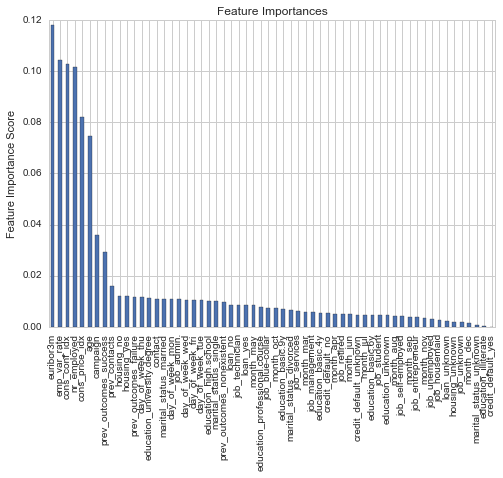

In [188]:
RF_F = RandomForestClassifier(max_features=6, n_estimators=96, random_state=seed)

modelfit(RF_F, X_train, y_train, X_train.columns.tolist())

In [189]:
# pipe = make_pipeline(StandardScaler(), gbm_tuned_3)

X_train_or = np.array(X_train_FS).copy(order='C') 
probas_ = RF_F.fit(X_train_or, y_train).predict_proba(X_test_FS)
print('test score', roc_auc_score(y_test,  probas_[:, 1]))


('test score', 0.77864699521756919)


In [489]:
# for GB

# param_test1 = {'n_estimators':range(20,81,10)}
# gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
#                                                                min_samples_leaf=50,max_depth=8,max_features='sqrt',
#                                                                subsample=0.8,random_state=seed), 
#                         param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch1.fit(X_train, y_train)

# print(gsearch1.best_params_, gsearch1.best_score_)

{'n_estimators': 60} 0.793955336463


In [490]:
# param_test2 = {'max_depth':range(5,16,2)}
# gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, 
#                                                                max_features='sqrt', subsample=0.8, 
#                                                                random_state=seed), 
#                         param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch2.fit(X_train, y_train)

# print(gsearch2.best_params_, gsearch2.best_score_)

{'min_samples_split': 1000, 'max_depth': 7} 0.79642297278


In [492]:
# param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
# gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,
#                                                                max_depth=7,max_features='sqrt', subsample=0.8, 
#                                                                random_state=seed), 
#                         param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch3.fit(X_train, y_train)

# print(gsearch3.best_params_, gsearch3.best_score_)

{'min_samples_split': 1200, 'min_samples_leaf': 30} 0.79642297278


In [493]:
# param_test4 = {'max_features':range(7,20,2)}
# gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,
#                                                                max_depth=7, min_samples_split=1200, 
#                                                                min_samples_leaf=30, subsample=0.8, 
#                                                                random_state=seed),
#                     param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch4.fit(X_train, y_train)

# print(gsearch4.best_params_, gsearch4.best_score_)

{'max_features': 7} 0.79642297278


In [163]:
# param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
# gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,
#                                                                max_depth=7, min_samples_split=1200, 
#                                                                min_samples_leaf=30, subsample=0.8, 
#                                                                random_state=seed, max_features=7),
#                         param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch5.fit(X_train, y_train)

# print(gsearch5.best_params_, gsearch5.best_score_)

({'subsample': 0.8}, 0.79571757909722862)


In [ ]:
# modelfit(gsearch5.best_estimator_, X_train, y_train, X_train.columns.tolist())

In [22]:
# param_test6 = {'learning_rate':[.2, .1, .05, .02, .01, .001, .005]}
# gsearch6 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=60,
#                                                                max_depth=7, min_samples_split=1200, 
#                                                                min_samples_leaf=30, subsample=0.8, 
#                                                                random_state=seed, max_features=7),
#                         param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch6.fit(X_train, y_train)

# print(gsearch6.best_params_, gsearch6.best_score_)

{'learning_rate': 0.1} 0.795717579097



Model Report
Accuracy : 0.9359
AUC Score (Train): 0.929789
CV Score : Mean - 0.7719402 | Std - 0.004480989 | Min - 0.7637973 | Max - 0.7768234


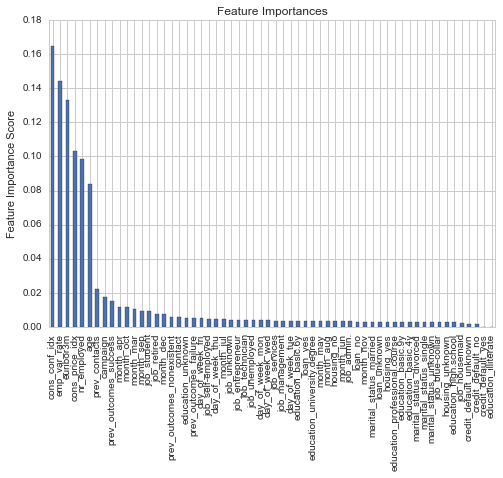

In [172]:
gbm_tunedF = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1200,
                                           max_depth=7, min_samples_split=1200, 
                                           min_samples_leaf=30, subsample=0.8, 
                                           random_state=seed, max_features=7)

modelfit(gbm_tunedF, X_train, y_train, X_train.columns.tolist())


In [176]:
# pipe = make_pipeline(StandardScaler(), gbm_tuned_3)

X_train_or = np.array(X_train_FS).copy(order='C') 
probas_ = gbm_tunedF.fit(X_train_or, y_train).predict_proba(X_test_FS)
print('test score', roc_auc_score(y_test,  probas_[:, 1]))


('test score', 0.79012959944837957)


# Step4 - Ensemble [20 points + 10 Bonus points]
In this step, we expect you to use the models created before and create new predictions. You should definitely try poor man's stacking but we encourage you to think of different ensemble techniques as well. We will judge your creativity and improvement in model performance using ensemble models and you can potentially earn 10 bonus points here.

In [245]:
#write code below, you can make multiple cells

# poor mans stacking
voting = VotingClassifier([('logreg', LogisticRegression(penalty='l2', C=10)),
                           ('lda', LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, 
                                                              n_components=None, store_covariance=False, tol=0.0001)),
                           ('rf', RF_F),
                           ('gbc', gbm_tunedF)
                          ],
                         voting='soft')

# param_grid = {'weights':list(permutations(range(1,4), 3))}
# voting = GridSearchCV(estimator=voting, 
#                         param_grid= param_grid, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# votingP = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, interaction_only=True), voting)
votingP = make_pipeline(StandardScaler(), voting)

votingP.fit(X_train_FS, y_train)
# lr, lda, gbc = voting.estimators_


Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('votingclassifier', VotingClassifier(estimators=[('logreg', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
    ...    subsample=0.8, verbose=0, warm_start=False))],
         n_jobs=1, voting='soft', weights=None))])

In [246]:
# print(("{:.2f} " * 4).format(voting.score(X_test, y_test),
#                              lr.score(X_test, y_test), lda.score(X_test, y_test), gbc.score(X_test, y_test)))
# print(voting.best_params_)
# print(voting.score(X_test, y_test))
auc_score = roc_auc_score(y_test, votingP.predict_proba(X_test_FS)[:,1])
print('auc', auc_score)

('auc', 0.79676144262004933)


In [240]:
# Couldn't get to work

# we need to reshape the result from votingclassifier.transform because
# of some annoyance in sklearn. We then keep only the probabilities of the positive classes!

# reshaper = FunctionTransformer(lambda X_: np.rollaxis(X_, 1).reshape(-1, 6)[:, 1::2], validate=False)
# stacking = make_pipeline(voting, reshaper, LogisticRegression(C=100))
# stacking.fit(X_train, y_train)
# print('auc', roc_auc_score(y_test, stacking.predict_proba(X_test)[:,1]))


# first_stage = make_pipeline(voting, reshaper)
# transform_cv = cross_val_predict(voting, X_train, y_train, cv=10)
# second_stage = LogisticRegression(C=100).fit(transform_cv, y_train, method="transform")
# prob = second_stage.predict_proba(X_test_FS)

In [205]:
# trying to do voting with uncorrelated submissions, doesn't work to well, so not used

df1 = pd.read_csv('./data/submission_68.csv')
df2 = pd.read_csv('./data/submission_78.csv')
df3 = pd.read_csv('./data/submission_739.csv')

# print(np.corrcoef(df1['subscribed'], df2['subscribed']))

def prob_voting(prob1, prob2, prob3):
    prob_maj = []
    for a,b,c in zip(prob1, prob2, prob3):
        if (a > .5 and b > .5 and c < .5) or (a < .5 and b < .5 and c > .5):
            prob_avg = np.mean([a,b])
        elif (a > .5 and b < .5 and c > .5) or (a < .5 and b > .5 and c < .5):
            prob_avg = np.mean([a,c])
        elif (a < .5 and b > .5 and c > .5) or (a > .5 and b < .5 and c < .5):
            prob_avg = np.mean([b,c])
        else:
            prob_avg = np.mean([a,b,c])
        prob_maj.append(prob_avg)
    
    return prob_maj

# try it with two most uncorrelated
# prob_maj = []
# for a,b in zip(df1['subscribed'], df2['subscribed']):
#         prob_maj.append(np.mean([a,b]))

prob_maj = prob_voting(df1['subscribed'], df2['subscribed'], df3['subscribed'])        

out = pd.DataFrame()
out['ID'] = df1['ID']
out['subscribed'] = prob_maj
out.to_csv('submission.csv', index=False)


# Bonus

In [259]:
# under sampling, does ok to equal
under_sam = make_imb_pipeline(RandomUnderSampler(), votingP)
score = np.mean(cross_val_score(under_sam, X_train_FS, y_train, cv=10, scoring='roc_auc'))
print(score)

0.786108627964


In [264]:
# over sampling with SMOTE, took to long and performed equal to before
# over_sam = make_imb_pipeline(SMOTE(), votingP)
# score = np.mean(cross_val_score(over_sam, X_train_FS, y_train, cv=10, scoring='roc_auc'))
# print(score)

In [207]:
def easyE(X, y, X_test, model):
    ee = EasyEnsemble(n_subsets=3, random_state=seed)
    X_resampled, y_resampled = ee.fit_sample(X, y)
    
    probs = []
    for i in range(len(X_resampled)):
        print(i)
        X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_resampled[i], y_resampled[i], test_size=0.2, 
                                                        random_state=seed)
        X_trainR_FS = select_LR.transform(X_trainR)
        X_testR_FS = select_LR.transform(X_testR)
        
        model.fit(X_trainR_FS, y_trainR)
        print('auc', roc_auc_score(y_testR, voting.predict_proba(X_testR_FS)[:,1]))
        pro = voting.predict_proba(X_test)[:,1]
        probs.append(pro)
    
    probsF_avg = (probs[0] + probs[1] + probs[2]) / 3.
   
    probF_maj = prob_voting(probs[0], probs[1], probs[2])
    
    return probsF_avg, probF_maj
                    

In [244]:
probsF_avg, probF_maj = easyE(X, y, X_test_FS, votingP)
auc_score_A = roc_auc_score(y_test, probsF_avg)
auc_score_M = roc_auc_score(y_test, probF_maj)
print('auc overall avg', auc_score_A)
print('auc overall maj', auc_score_M)

0
('auc', 0.78627766277517253)
1
('auc', 0.78760009167870249)
2
('auc', 0.8050135880934105)
('auc overall avg', 0.78952326871951062)
('auc overall maj', 0.78667021876762977)


### Final Model Chosen, still just voting classifier

In [247]:
prob = votingP.fit(X_train_FS, y_train).predict_proba(X_test_FS)[:,1]
auc_score = roc_auc_score(y_test, prob)
print(auc_score)

0.79676144262


In [257]:
assert auc_score >= .78

# Kaggle Submissions

In [254]:
def kaggle(model, fit=False, EE=False, avg=False):
    holdout = pd.read_csv('./data/holdout.csv')
    X_test = clean_master(holdout, holdout=True)
    X_test = X_test.drop('ID', axis=1)
    # use the feature selection
    X_test = select_LR.transform(X_test)
    if not fit:
        model = make_pipeline(StandardScaler(), model)
        model.fit(X_train_FS, y_train)
    if EE:
        probs_avg, probF_maj = easyE(X, y, X_test, model)
        if avg:
            probas = probs_avg
        else:
            probas = probF_maj
    else:
        probas = model.predict_proba(X_test)[:, 1]
        
    out = pd.DataFrame()
    out['ID'] = holdout['ID']
    out['subscribed'] = probas
    out.to_csv('submission.csv', index=False)

In [256]:
kaggle(votingP, fit=False, EE=True, avg=False)

0
('auc', 0.78627766277517253)
1
('auc', 0.78760009167870249)
2
('auc', 0.80296536946153318)
